# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load Text Cleaning Pakcages
import neattext.functions as nfx

In [3]:
# Load Dataset
df = pd.read_csv("C:/Users/User1/Downloads/emotion_dataset_raw.csv")
df

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...
34788,joy,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."


In [4]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [5]:
df.shape

(34792, 2)

dataset contain 34,792 rows and 2 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [7]:
df.describe()

,Emotion,Text
count,34792,34792
unique,8,31110
top,joy,Yes .
freq,11045,76


There are 8 unique values in emotion columns. i.e,8 unique emotions.  
Joy is more in count.

In [8]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [9]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

There is no null values in the dataset.

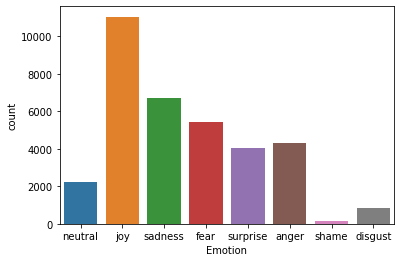

In [10]:
sns.countplot(x='Emotion',data=df)
plt.show()

From the above graph joy has the highest count then followed by sadness,fear,anger etc.

Shame is least in count.

## Data preprocessing 

In [11]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [12]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [13]:
# Stopwords removal
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [14]:
#remove special characters
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_special_characters)

In [15]:
#change uppercase to lowercase
df['Clean_Text']=df['Clean_Text'].str.lower()

In [16]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,
1,joy,Sage Act upgrade on my to do list for tommorow.,sage act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,way homegirl baby funeral man hate funerals sh...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e b...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift hope like it hand wear itll warm lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world definitely cnt away
34789,anger,A man robbed me today .,man robbed today
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",youu jealousy losing you


In [17]:
df[df['Emotion']=='joy']

,Emotion,Text,Clean_Text
1,joy,Sage Act upgrade on my to do list for tommorow.,sage act upgrade list tommorow
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e b...
12,joy,"For once in his life , Leopold must have been ...",life leopold truly happy hopes prayers belov...
17,joy,I have a feeling i will fail french #fuckfrench,feeling fail french fuckfrench
...,...,...,...
34778,joy,"In other news, my mum made EFO.",news mum efo
34784,joy,~ As musicas que nois danço com os munitores t...,musicas que nois dano com os munitores todo d...
34785,joy,When I understood that I was admitted to the U...,understood admitted university
34786,joy,Tuesday woken up to Oscar and Cornet practice X,tuesday woken oscar cornet practice x


In [18]:
df[df['Emotion']=='shame']

,Emotion,Text,Clean_Text
33,shame,"Nobody doubted him , or failed to recognise hi...",doubted failed recognise temporary financial ...
341,shame,""" What 's this , playing infant games still ? ...",s playing infant games demanded gratified...
610,shame,I also remember being extremely ashamed at som...,remember extremely ashamed racist chants leeds...
746,shame,"Jasper reddened and pressed his lip together ,...",jasper reddened pressed lip farraline looked ...
1077,shame,Now she was getting increasingly embarrassed a...,getting increasingly embarrassed mattie sat wa...
...,...,...,...
33117,shame,Bob became embarrassed at his own effusiveness...,bob embarrassed effusiveness turned screen t...
33560,shame,"He grinned unrepentantly , watching her deep b...",grinned unrepentantly watching deep blush emb...
33798,shame,The row over the Fayed brothers ' acquisition ...,row fayed brothers acquisition simmers thank...
33967,shame,Sendei was n't ashamed to show his fear .,sendei nt ashamed fear


## Train Test split

In [19]:
# Features & Labels
x = df['Clean_Text']
y = df['Emotion']

In [20]:
#  Split Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [21]:
# Build Pipeline
from sklearn.pipeline import Pipeline

## Modelling

### logistic regression

In [22]:
# LogisticRegression Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [24]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [25]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [26]:
y_pred = pipe_lr.predict(x_test)
y_pred

array(['surprise', 'anger', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype=object)

In [27]:
# Check Accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.6215750143705691


In [28]:
pipe_lr.score(x_train,y_train)

0.8996468752566313

In [29]:
pipe_lr.score(x_test,y_test)

0.6215750143705691

In [30]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 702,    8,   65,  236,   77,  152,    1,   42],
       [  38,   52,   24,   89,    7,   55,    1,   26],
       [  76,    5, 1064,  234,   39,  146,    0,   81],
       [ 115,    6,  126, 2492,  116,  278,    1,  177],
       [  13,    1,   11,   97,  490,   55,    0,    8],
       [ 122,    9,   94,  469,   66, 1160,    1,   94],
       [   0,    0,    1,    5,    1,    2,   27,    0],
       [  53,    6,   48,  399,   28,  145,    1,  501]], dtype=int64)

### Random forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [32]:
pipe_rfc = Pipeline(steps=[('cv',CountVectorizer()),('rfc',RandomForestClassifier())])

In [33]:
# Train and Fit Data
pipe_rfc.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('rfc', RandomForestClassifier())])

In [34]:
pipe_rfc

Pipeline(steps=[('cv', CountVectorizer()), ('rfc', RandomForestClassifier())])

In [35]:
y_pred = pipe_rfc.predict(x_test)
y_pred

array(['joy', 'anger', 'sadness', ..., 'sadness', 'anger', 'neutral'],
      dtype=object)

In [36]:
# Check Accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.578846522322284


### Naive bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
multi_nb =  MultinomialNB()

In [39]:
pipe_multi_nb = Pipeline(steps=[('cv',CountVectorizer()),('multi_nb',MultinomialNB())])

In [40]:
# Train and Fit Data
pipe_multi_nb.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('multi_nb', MultinomialNB())])

In [41]:
pipe_multi_nb

Pipeline(steps=[('cv', CountVectorizer()), ('multi_nb', MultinomialNB())])

In [42]:
y_pred = pipe_multi_nb.predict(x_test)
y_pred

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')

In [43]:
# Check Accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.5713738264035256


### SVC

In [44]:
from sklearn.svm import SVC

In [45]:
sv=SVC(kernel='linear') 

In [46]:
pipe_sv = Pipeline(steps=[('cv',CountVectorizer()),('sv',SVC())])

In [47]:
pipe_sv.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('sv', SVC())])

In [48]:
pipe_sv

Pipeline(steps=[('cv', CountVectorizer()), ('sv', SVC())])

In [49]:
y_pred = pipe_sv.predict(x_test)
y_pred

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype=object)

In [50]:
# Check Accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.6141023184518107


### Boosting

In [51]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(learning_rate=1)

In [52]:
pipe_adaboost = Pipeline(steps=[('cv',CountVectorizer()),('adaboost',AdaBoostClassifier())])

In [53]:
pipe_adaboost.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('adaboost', AdaBoostClassifier())])

In [54]:
y_pred = pipe_adaboost.predict(x_test)
y_pred

array(['joy', 'joy', 'joy', ..., 'joy', 'joy', 'joy'], dtype=object)

In [55]:
# Check Accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.33358881011688063


### Bagging

In [56]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(max_samples=100,bootstrap=True)

In [57]:
pipe_bc = Pipeline(steps=[('cv',CountVectorizer()),('bc',BaggingClassifier())])

In [58]:
pipe_bc.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('bc', BaggingClassifier())])

In [59]:
y_pred = pipe_bc.predict(x_test)
y_pred

array(['fear', 'anger', 'sadness', ..., 'sadness', 'anger', 'neutral'],
      dtype=object)

In [60]:
# Check Accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.558919333205595


### Prediction using logistic model

In [61]:
ex1 = "This book was so interesting it made me happy"

In [62]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [63]:
ex2 = ""

In [64]:
pipe_lr.predict([ex2])

array(['neutral'], dtype=object)

In [65]:
ex3 = "way homegirl baby funeral man hate funerals sh"

In [66]:
pipe_lr.predict([ex3])

array(['sadness'], dtype=object)

In [67]:
ex4="gift hope like it hand wear Itll warm lol"

In [68]:
pipe_lr.predict([ex4])

array(['surprise'], dtype=object)

In [69]:
ex5="kill work number slakers wandering around nothing"

In [70]:
pipe_lr.predict([ex5])

array(['anger'], dtype=object)

In [71]:
ex6="riding friend car speed 120 kmh snowcovered mo"

In [72]:
pipe_lr.predict([ex6])

array(['fear'], dtype=object)

In [73]:
ex7="ewww got nasty ass default like cute"

In [74]:
pipe_lr.predict([ex7])

array(['disgust'], dtype=object)

In [75]:
ex8="remember extremely ashamed racist chants leeds"

In [76]:
pipe_lr.predict([ex8])

array(['shame'], dtype=object)

predicted all 8 unique emotions in the dataset